# Atomic and molecular gas profiles in Galaxy

In [2]:
from pylab import *

In [3]:
#Importing data
data = np.genfromtxt('gas_Galprop.txt')
radius = data[:,0]
height = data[:,1]
atomic_density = data[:,2]
molecular_density = data[:,3]

In [10]:
#Cylindrical to spherical coordinates
Earth_position = 8 #in kpc
s = np.sqrt((radius - Earth_position)**2 + height**2)

Text(0.5, 1.0, 'Radial gas profile')

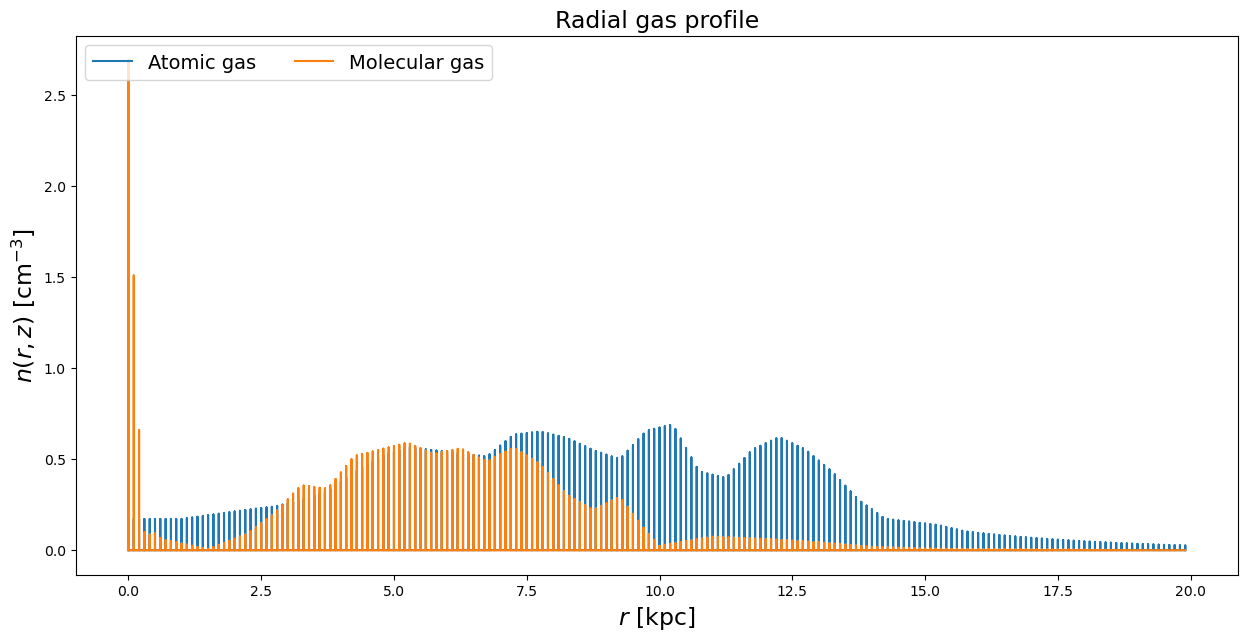

In [7]:
plt.figure(figsize=(15, 7))
plt.plot(radius, atomic_density, label='Atomic gas')
plt.plot(radius, molecular_density, label='Molecular gas')
plt.xlabel(r'$r$ [kpc]', fontsize=17)
plt.ylabel(r'$n(r,z)$ [cm$^{-3}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('Radial gas profile', fontsize=17)

Text(0.5, 1.0, 'Gas profile along z')

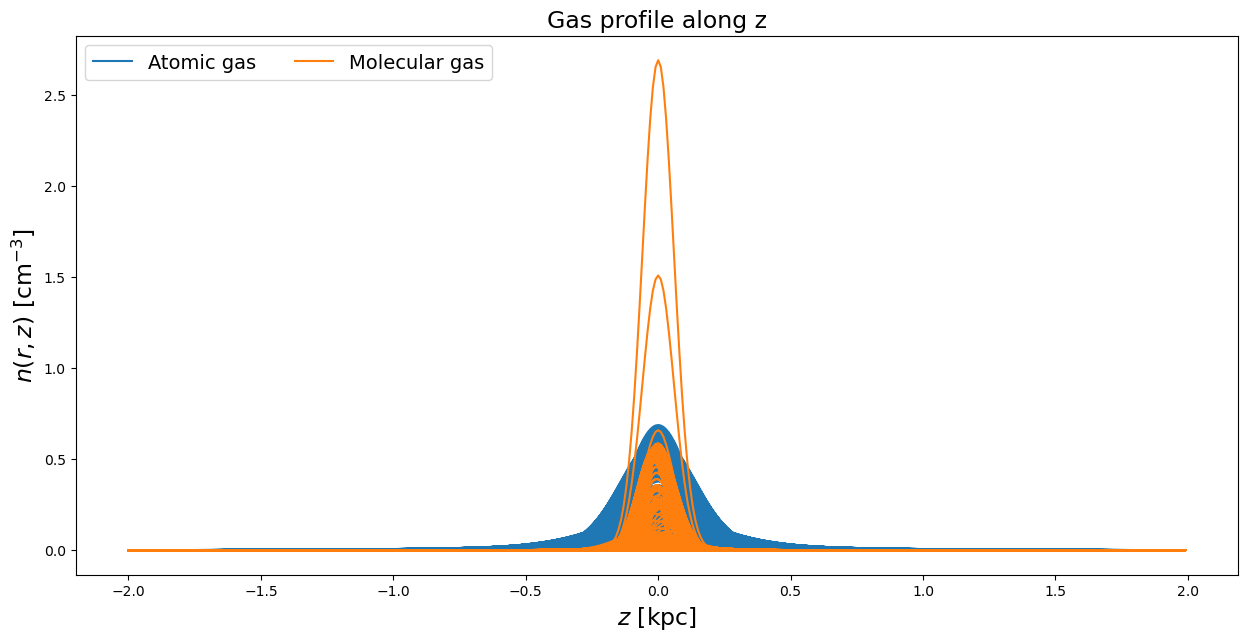

In [8]:
plt.figure(figsize=(15, 7))
plt.plot(height, atomic_density, label='Atomic gas')
plt.plot(height, molecular_density, label='Molecular gas')
plt.xlabel(r'$z$ [kpc]', fontsize=17)
plt.ylabel(r'$n(r,z)$ [cm$^{-3}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('Gas profile along z', fontsize=17)

Text(0.5, 1.0, 'Gas profile along line-of-sight')

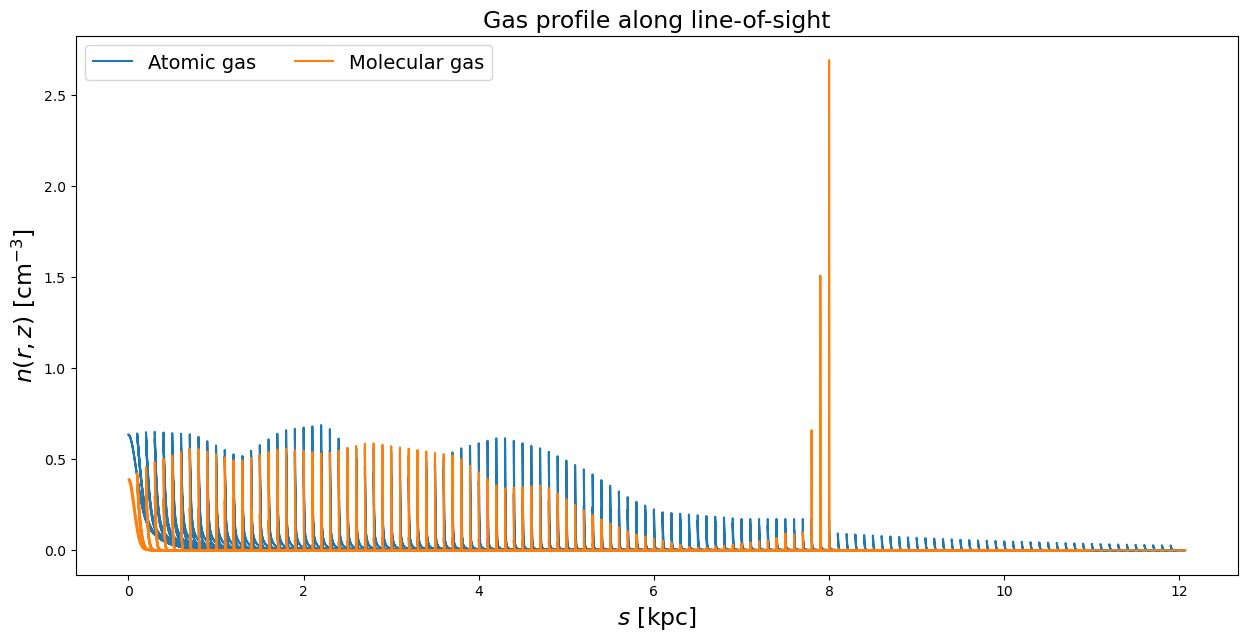

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(s, atomic_density, label='Atomic gas')
plt.plot(s, molecular_density, label='Molecular gas')
plt.xlabel(r'$s$ [kpc]', fontsize=17)
plt.ylabel(r'$n(r,z)$ [cm$^{-3}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('Gas profile along line-of-sight', fontsize=17)